In [1]:
import urllib.request
import json
import dml
import prov.model
import datetime
import uuid
import statistics
import pandas as pd
from bson.code import Code
import matplotlib.pyplot as plt
%matplotlib inline

# Set up the database connection.
client = dml.pymongo.MongoClient()
repo = client.repo
repo.authenticate('anuragp1_jl101995', 'anuragp1_jl101995')

def scaleEntry(OldValue):
    OldMax = 800000
    OldMin = 100000
    NewMax = 200
    NewMin = 100
    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
    return NewValue

def scalePrecip(OldValue):
    OldMax = 10
    OldMin = 0
    NewMax = 100
    NewMin = 0
    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
    return NewValue

print('Loading ped_data from Mongo')

tw_data = repo.anuragp1_jl101995.turnstile_weather.find()
data =[]
for entry in tw_data:
    data.append((scalePrecip(entry['Precip']),entry['AvgTemp'] , scaleEntry(entry['Entries']), entry['Date']))
    
tw_df = pd.DataFrame(data, columns = ['Precip', 'Temp', 'Entries', 'Date'])

print('Finished')

Loading ped_data from Mongo
Finished


[]

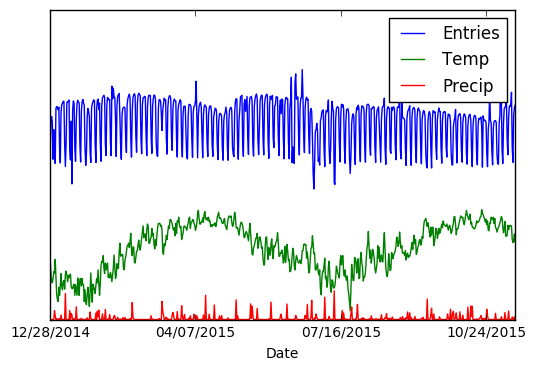

In [2]:
ax = tw_df.plot(x='Date', y=['Entries','Temp' ,'Precip'])
#ax.set_yscale('log')
ax.locator_params(axis='x',nbins=6)
ax.axes.get_yaxis().set_ticks([])

In [3]:
def scaleCiti(OldValue):
    OldMax = 40000
    OldMin = 1000
    NewMax = 200
    NewMin = 100
    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
    return NewValue

print('Loading ped_data from Mongo')
cw_data = repo.anuragp1_jl101995.citibike_weather.find()
data =[]
for entry in cw_data:
    data.append((scalePrecip(entry['Precip']),entry['AvgTemp'] , scaleCiti(entry['Citibike_Usage']), entry['Date']))
cw_df = pd.DataFrame(data, columns = ['Precip', 'Temp', 'Citi_Use', 'Date'])

print('Finished')

Loading ped_data from Mongo
Finished


[]

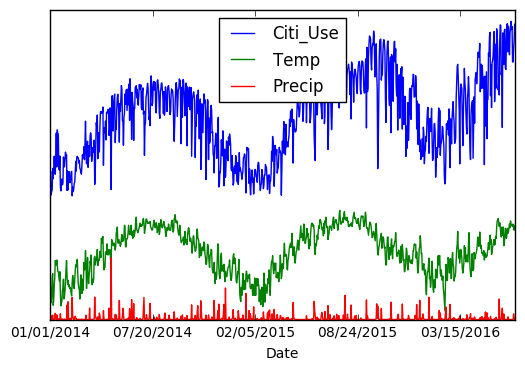

In [4]:
ax = cw_df.plot(x='Date', y=['Citi_Use','Temp' ,'Precip'])
#ax.set_yscale('log')
ax.axes.get_yaxis().set_ticks([])

[None]

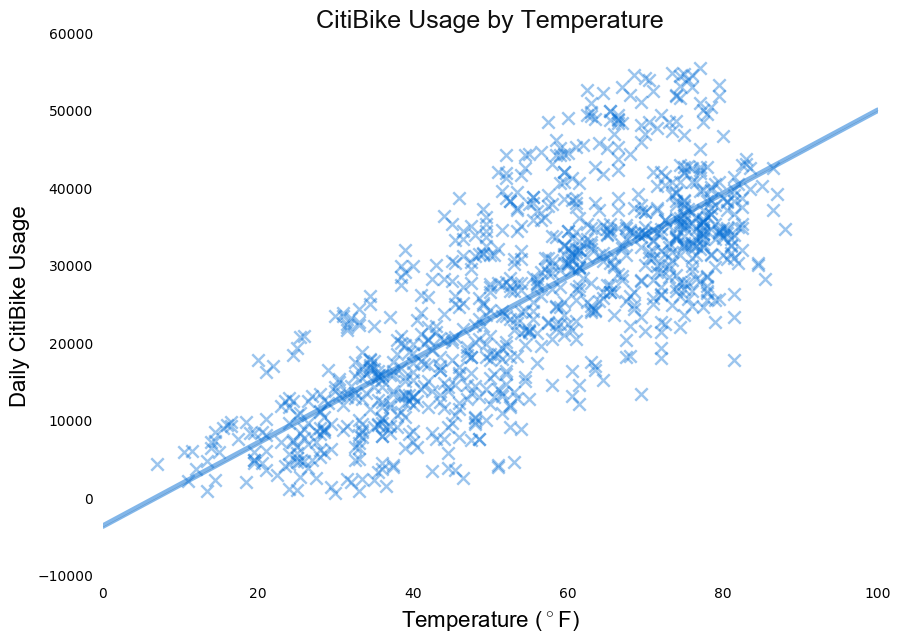

In [167]:
# Plotting CitiBike usage and weather

import matplotlib.pyplot as plt
import pylab
import seaborn as sns

cw_noscale_data = repo.anuragp1_jl101995.citibike_weather.find()
data =[]
for entry in cw_noscale_data:
    data.append(((entry['Precip']),entry['AvgTemp'] , (entry['Citibike_Usage']), entry['Date']))
cw_noscale_df = pd.DataFrame(data, columns = ['Precip', 'Temp', 'Citi_Use', 'Date'])

# Create scatterplot with regression line
c = sns.regplot(x='Temp', y='Citi_Use', data=cw_noscale_df, ci = False, 
    scatter_kws={'color':'#066FD5','alpha':0.4,'s':80},
    line_kws={'color':'#066FD5','alpha':0.5,'lw':4},marker='x')

# remove the top and right line in graph
sns.despine()

# Set graph size
c.figure.set_size_inches(10,7)
# Set graph title
c.axes.set_title('CitiBike Usage by Temperature',color='black',fontsize=18,alpha=0.95)
# Set xlabel
c.set_xlabel(r'Temperature ($^\circ$F)',size = 16,color='black',alpha=1)
# Set ylabel
c.set_ylabel('Daily CitiBike Usage',size = 16,color='black',alpha=1)
# Set ticklabel
c.tick_params(labelsize=10,labelcolor='black')
c.set(axis_bgcolor='w')



[None]

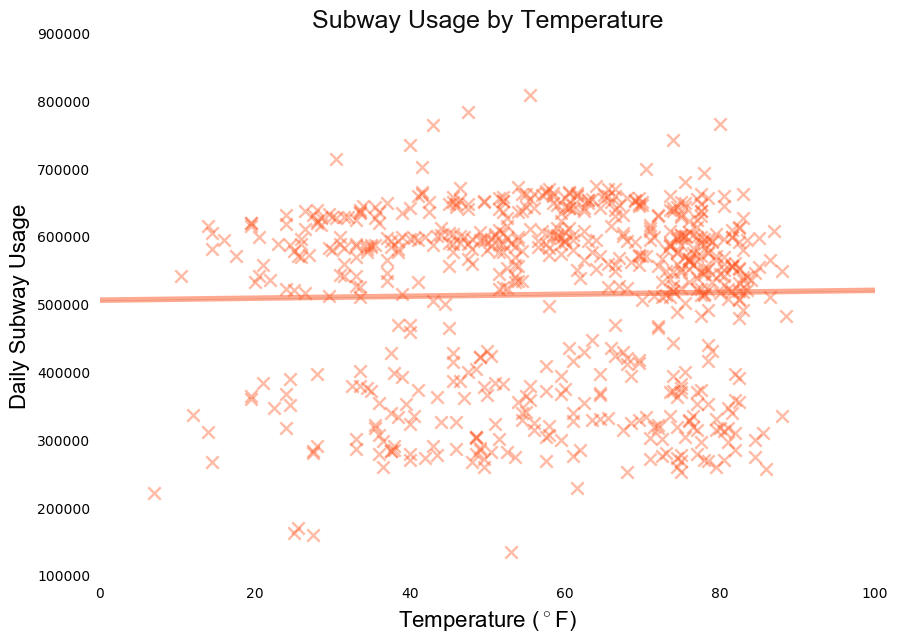

In [168]:
# Plotting subway usage and weather

tw_noscale_data = repo.anuragp1_jl101995.turnstile_weather.find()
tw_noscale_data
data =[]
for entry in tw_noscale_data:
    data.append(((entry['Precip']),entry['AvgTemp'], (entry['Entries']), entry['Date']))
tw_noscale_df = pd.DataFrame(data, columns = ['Precip', 'Temp', 'Subway_Use', 'Date'])

# Create scatterplot with regression line
s = sns.regplot(x='Temp', y='Subway_Use', data=tw_noscale_df, ci = False, 
    scatter_kws={'color':'#FF5722','alpha':0.4,'s':80},
    line_kws={'color':'#FF5722','alpha':0.5,'lw':4},marker='x')

# remove the top and right line in graph
sns.despine()

# Set graph size
s.figure.set_size_inches(10,7)
# Set graph title
s.axes.set_title('Subway Usage by Temperature',color='black',fontsize=18,alpha=0.95)
# Set xlabel
s.set_xlabel(r'Temperature ($^\circ$F)',size = 16,color='black',alpha=1)
# Set ylabel
s.set_ylabel('Daily Subway Usage',size = 16,color='black',alpha=1)
# Set ticklabel
s.tick_params(labelsize=10,labelcolor='black')
s.set(axis_bgcolor='w')